In [1]:
from typing import List
!pip install pyarrow

from src import visualization

In [2]:
from importlib import reload
import src.features as features
reload(features)
from src.features import get_historical_data

In [3]:
data_df = get_historical_data(symbol= "BTCUSDT")
data_df.head()

C:\Users\Amin\PycharmProjects\PythonProject\src\features.py:34: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  df = pl.DataFrame(klines, schema=cols)


date,open,high,low,close,volume
datetime[ms],f64,f64,f64,f64,f64
2020-11-11 00:00:00,15297.21,15499.58,15272.68,15401.9,11252.097142
2020-11-11 04:00:00,15401.9,15441.37,15322.02,15400.51,5830.865996
2020-11-11 08:00:00,15400.5,15680.0,15363.37,15574.48,13706.745887
2020-11-11 12:00:00,15574.48,15718.91,15477.0,15667.27,13545.826971
2020-11-11 16:00:00,15667.5,15965.0,15639.21,15807.58,22805.0493


In [17]:
from src.features import create_time_series_transform

In [20]:
from importlib import reload
import src.features as features
reload(features)


<module 'src.features' from 'C:\\Users\\Amin\\PycharmProjects\\PythonProject\\src\\features.py'>

In [4]:
from src.features import create_time_series_transform

In [5]:
df = create_time_series_transform(data_df,"close",forecast_horizon=1)

In [6]:
df

date,open,high,low,close,volume,close_log_return,log_volume
datetime[ms],f64,f64,f64,f64,f64,f64,f64
2020-11-11 00:00:00,15297.21,15499.58,15272.68,15401.9,11252.097142,null,null
2020-11-11 04:00:00,15401.9,15441.37,15322.02,15400.51,5830.865996,-0.00009,-0.657389
2020-11-11 08:00:00,15400.5,15680.0,15363.37,15574.48,13706.745887,0.011233,0.854723
2020-11-11 12:00:00,15574.48,15718.91,15477.0,15667.27,13545.826971,0.00594,-0.01181
2020-11-11 16:00:00,15667.5,15965.0,15639.21,15807.58,22805.0493,0.008916,0.520903
…,…,…,…,…,…,…,…
2025-11-20 16:00:00,89869.88,89911.73,86100.0,86921.28,17595.68288,-0.03336,1.049114
2025-11-20 20:00:00,86921.27,88250.0,86325.23,86637.23,5052.86651,-0.003273,-1.247698
2025-11-21 00:00:00,86637.22,87498.94,85360.0,85821.34,6428.51913,-0.009462,0.240788


In [7]:
new=features.create_time_series_transform(df)

In [8]:
new

date,open,high,low,close,volume,close_log_return,log_volume
datetime[ms],f64,f64,f64,f64,f64,f64,f64
2020-11-11 00:00:00,15297.21,15499.58,15272.68,15401.9,11252.097142,null,null
2020-11-11 04:00:00,15401.9,15441.37,15322.02,15400.51,5830.865996,-0.00009,-0.657389
2020-11-11 08:00:00,15400.5,15680.0,15363.37,15574.48,13706.745887,0.011233,0.854723
2020-11-11 12:00:00,15574.48,15718.91,15477.0,15667.27,13545.826971,0.00594,-0.01181
2020-11-11 16:00:00,15667.5,15965.0,15639.21,15807.58,22805.0493,0.008916,0.520903
…,…,…,…,…,…,…,…
2025-11-20 16:00:00,89869.88,89911.73,86100.0,86921.28,17595.68288,-0.03336,1.049114
2025-11-20 20:00:00,86921.27,88250.0,86325.23,86637.23,5052.86651,-0.003273,-1.247698
2025-11-21 00:00:00,86637.22,87498.94,85360.0,85821.34,6428.51913,-0.009462,0.240788


In [9]:
from importlib import reload
import src.features as features
reload(features)

<module 'src.features' from 'C:\\Users\\Amin\\PycharmProjects\\PythonProject\\src\\features.py'>

In [10]:
from src.features import create_lag_feature



In [11]:
df = create_lag_feature(new,["close_log_return"],max_lags=4,forecast_horizon=1)
df

date,open,high,low,close,volume,close_log_return,log_volume,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3,close_log_return_lag4
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-11-11 20:00:00,15807.58,15886.0,15576.04,15684.24,11329.161162,-0.007833,-0.699602,0.008916,0.00594,0.011233,-0.00009
2020-11-12 00:00:00,15684.25,15711.77,15440.64,15628.14,11628.021693,-0.003583,0.026038,-0.007833,0.008916,0.00594,0.011233
2020-11-12 04:00:00,15628.14,15945.0,15591.54,15862.75,10308.733321,0.0149,-0.120426,-0.003583,-0.007833,0.008916,0.00594
2020-11-12 08:00:00,15862.75,16160.89,15600.0,15762.55,27118.660196,-0.006337,0.967231,0.0149,-0.003583,-0.007833,0.008916
2020-11-12 12:00:00,15762.55,16144.5,15747.14,16125.01,20899.418386,0.022735,-0.260501,-0.006337,0.0149,-0.003583,-0.007833
…,…,…,…,…,…,…,…,…,…,…,…
2025-11-20 16:00:00,89869.88,89911.73,86100.0,86921.28,17595.68288,-0.03336,1.049114,-0.022708,-0.004192,-0.0013,0.009624
2025-11-20 20:00:00,86921.27,88250.0,86325.23,86637.23,5052.86651,-0.003273,-1.247698,-0.03336,-0.022708,-0.004192,-0.0013
2025-11-21 00:00:00,86637.22,87498.94,85360.0,85821.34,6428.51913,-0.009462,0.240788,-0.003273,-0.03336,-0.022708,-0.004192


In [42]:
import seaborn as sns

In [12]:
import src.visualization
from importlib import reload

reload(src.visualization)


from src.visualization import plot_feature_distribution


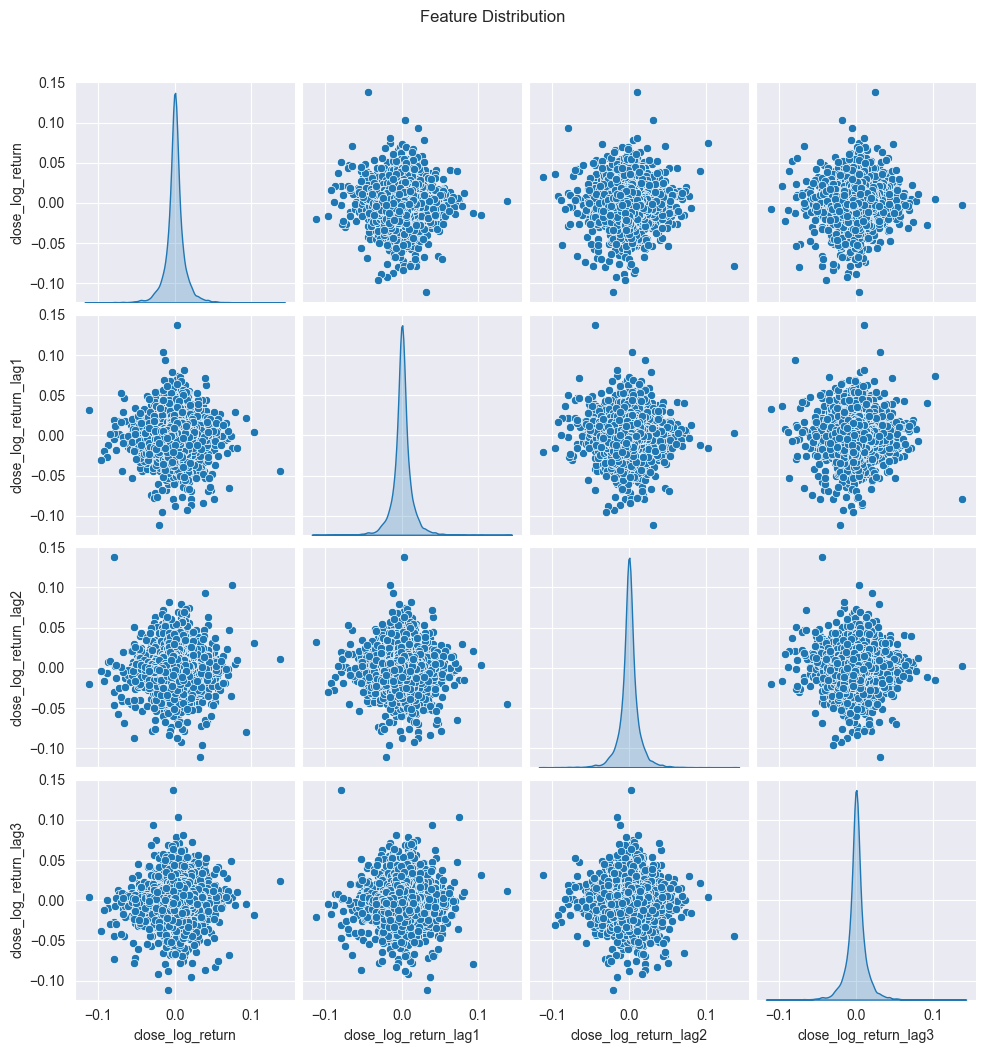

In [17]:
plot_feature_distribution(df,["close_log_return","close_log_return_lag1","close_log_return_lag2","close_log_return_lag3"])

In [18]:
df

date,open,high,low,close,volume,close_log_return,log_volume,close_log_return_lag1,close_log_return_lag2,close_log_return_lag3,close_log_return_lag4
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020-11-11 20:00:00,15807.58,15886.0,15576.04,15684.24,11329.161162,-0.007833,-0.699602,0.008916,0.00594,0.011233,-0.00009
2020-11-12 00:00:00,15684.25,15711.77,15440.64,15628.14,11628.021693,-0.003583,0.026038,-0.007833,0.008916,0.00594,0.011233
2020-11-12 04:00:00,15628.14,15945.0,15591.54,15862.75,10308.733321,0.0149,-0.120426,-0.003583,-0.007833,0.008916,0.00594
2020-11-12 08:00:00,15862.75,16160.89,15600.0,15762.55,27118.660196,-0.006337,0.967231,0.0149,-0.003583,-0.007833,0.008916
2020-11-12 12:00:00,15762.55,16144.5,15747.14,16125.01,20899.418386,0.022735,-0.260501,-0.006337,0.0149,-0.003583,-0.007833
…,…,…,…,…,…,…,…,…,…,…,…
2025-11-20 16:00:00,89869.88,89911.73,86100.0,86921.28,17595.68288,-0.03336,1.049114,-0.022708,-0.004192,-0.0013,0.009624
2025-11-20 20:00:00,86921.27,88250.0,86325.23,86637.23,5052.86651,-0.003273,-1.247698,-0.03336,-0.022708,-0.004192,-0.0013
2025-11-21 00:00:00,86637.22,87498.94,85360.0,85821.34,6428.51913,-0.009462,0.240788,-0.003273,-0.03336,-0.022708,-0.004192


In [22]:
import src.visualization
from importlib import reload

reload(src.visualization)


from src.visualization import display_feature_corr
display_feature_corr(df,"close_log_return")


Feature,Abs_correlation
str,f64
"""close_log_return""",1.0
"""log_volume""",0.04651
"""close_log_return_lag3""",0.029705
"""close_log_return_lag1""",0.029498
"""close_log_return_lag2""",0.01708
…,…
"""close_log_return_lag4""",0.008427
"""close""",0.005446
"""date""",0.005246
